In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np


In [31]:
df = pd.read_excel("Final_1.xlsx")
df = df[df['Well Name'] != 'CHURCHMAN BIBLE']


df = df[['Depth','GR','ILD_log10','DeltaPHI','PHIND','PE','RELPOS','Facies','Core_Porosity','Core_Perm','Bulk_Dens','Pred_Perm','Well Name', 'Formation']]
df = df.sort_values(by='Depth')
df

,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,RELPOS,Facies,Core_Porosity,Core_Perm,Bulk_Dens,Pred_Perm,Well Name,Formation
2286,2573.5,118.439,0.674494,6.300,9.9500,3.63100,1.000,2,0.046,0.000024,2.523835,0.004316,CROSS H CATTLE,A1 SH
2287,2574.0,92.550,0.645226,9.900,13.0500,3.45000,0.987,2,0.046,0.000024,2.472065,0.004529,CROSS H CATTLE,A1 SH
2288,2574.5,102.168,0.630021,12.000,14.5000,3.36400,0.974,2,0.046,0.000024,2.447850,0.004632,CROSS H CATTLE,A1 SH
2289,2575.0,88.898,0.600319,15.100,16.0500,3.18700,0.961,2,0.046,0.000024,2.421965,0.004745,CROSS H CATTLE,A1 SH
2290,2575.5,85.493,0.578639,13.600,15.9000,3.09900,0.947,2,0.046,0.000024,2.424470,0.004734,CROSS H CATTLE,A1 SH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2281,3136.0,86.023,0.688000,10.949,11.7335,3.51316,0.405,4,0.104,0.010000,2.485224,0.011723,KIMZEY A,C LM
2282,3136.5,101.037,0.732000,10.179,12.0085,3.63058,0.393,6,0.034,0.002900,2.515855,0.011768,KIMZEY A,C LM
2283,3137.0,153.374,0.748000,8.198,13.4390,3.72336,0.381,6,0.034,0.002900,2.491537,0.012005,KIMZEY A,C LM
2284,3137.5,144.117,0.672000,9.188,13.4390,3.66618,0.369,6,0.034,0.002900,2.491537,0.012005,KIMZEY A,C LM


In [32]:
df['Formation'].unique()

array(['A1 SH', 'A1 LM', 'B1 SH', 'B1 LM', 'B2 SH', 'B3 SH', 'B2 LM',
       'B4 SH', 'B3 LM', 'B4 LM', 'B5 SH', 'B5 LM', 'C SH', 'C LM'],
      dtype=object)

In [33]:
df['Formation'].unique()


array(['A1 SH', 'A1 LM', 'B1 SH', 'B1 LM', 'B2 SH', 'B3 SH', 'B2 LM',
       'B4 SH', 'B3 LM', 'B4 LM', 'B5 SH', 'B5 LM', 'C SH', 'C LM'],
      dtype=object)

In [18]:
well = pd.DataFrame()
def z_score(log):
    z_scores = stats.zscore(df[log])
    df_clean = df.copy()  # Make a copy of the DataFrame to avoid modifying the original
    df_clean.loc[np.abs(z_scores) >= 3, log] = np.nan  # Replace outliers with NaNs
    well[log] = df_clean[log]
    
    plt.hist(df[log],color=np.random.rand(3,), label= 'Raw')
    plt.hist(df_clean[log],color=np.random.rand(3,),label="Filtered")

    plt.legend()
    plt.xlabel(log)
    plt.ylabel("Frequency")
    plt.show()

    plt.figure(figsize=(3,8))
    plt.plot(df[log],df['Depth'],color=np.random.rand(3,), label= 'Raw')
    plt.plot(df_clean[log],df['Depth'],color=np.random.rand(3,),label="Filtered")
    plt.gca().invert_yaxis()

    plt.xlabel(log)
    plt.ylabel("Depth")
    plt.legend()
    plt.show()

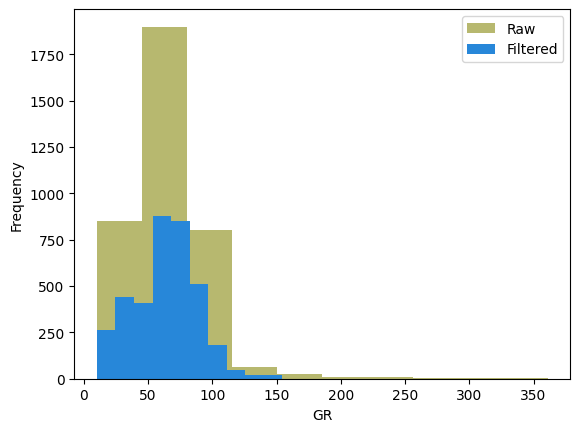

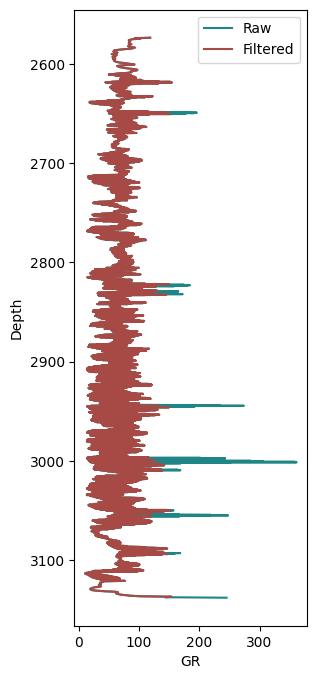

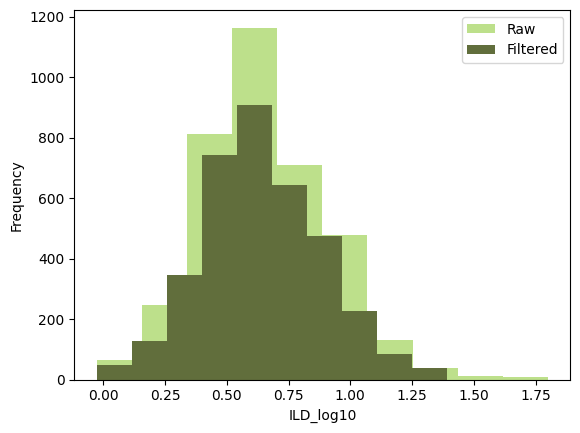

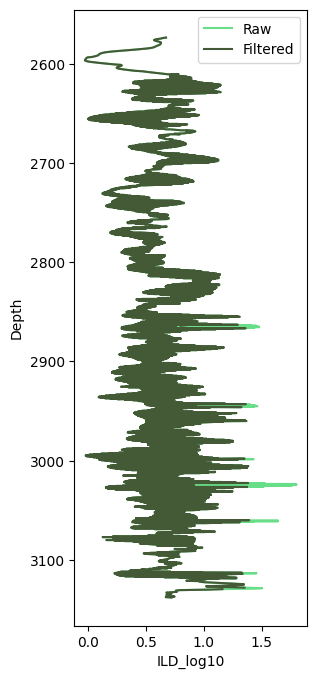

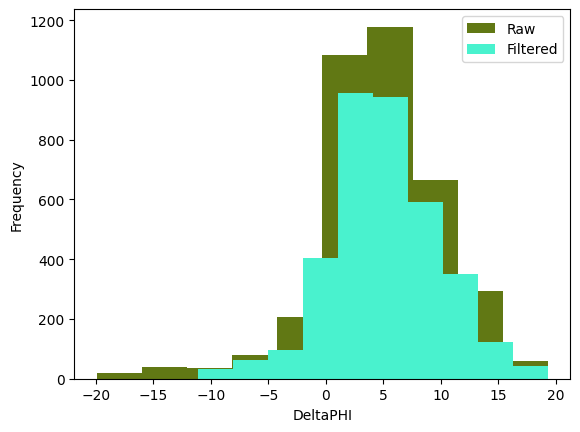

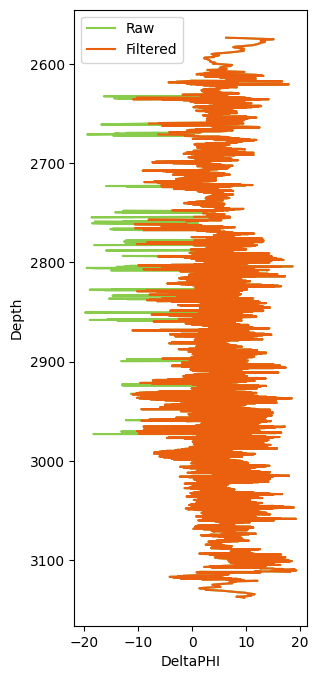

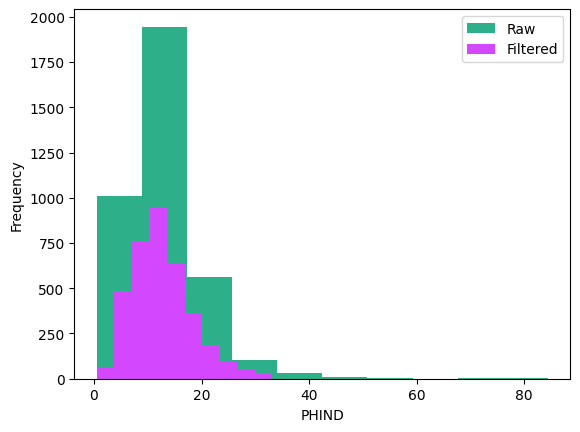

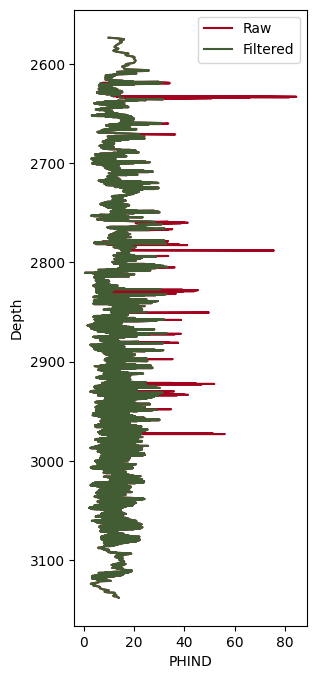

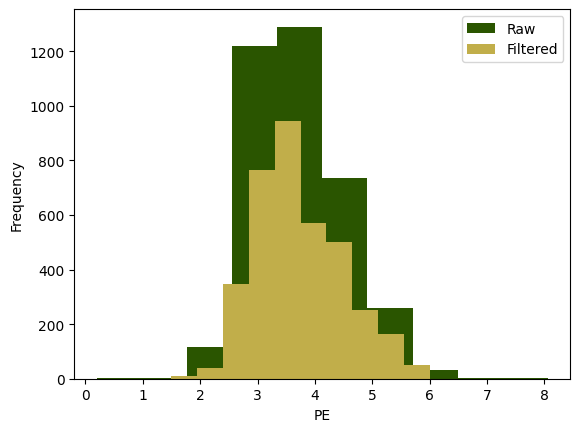

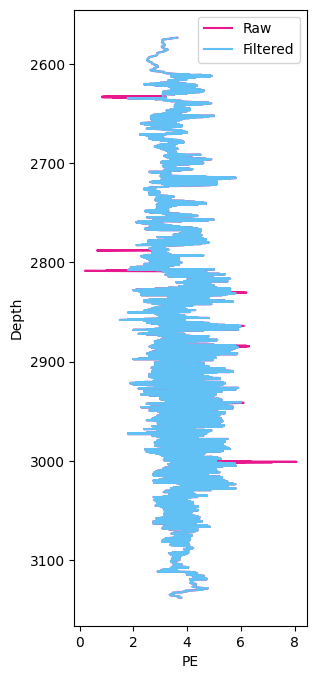

In [19]:
z_score('GR')
z_score('ILD_log10')
z_score('DeltaPHI')
z_score('PHIND')
z_score('PE')

In [20]:
well['RELPOS'] = df['RELPOS']
well['Facies'] = df['Facies']
well['Depth'] = df['Depth']
well['Formation'] = df['Formation']
well['Well Name'] = df['Well Name']
well['Core_Porosity'] = df['Core_Porosity']
well['Core_Perm'] = df['Core_Perm']
well['Bulk_Dens'] = df['Bulk_Dens']
well['Pred_Perm'] = df['Pred_Perm']
well

,GR,ILD_log10,DeltaPHI,PHIND,PE,RELPOS,Facies,Depth,Formation,Well Name,Core_Porosity,Core_Perm,Bulk_Dens,Pred_Perm
2286,118.439,0.674494,6.300,9.9500,3.63100,1.000,2,2573.5,A1 SH,CROSS H CATTLE,0.046,0.000024,2.523835,0.004316
2287,92.550,0.645226,9.900,13.0500,3.45000,0.987,2,2574.0,A1 SH,CROSS H CATTLE,0.046,0.000024,2.472065,0.004529
2288,102.168,0.630021,12.000,14.5000,3.36400,0.974,2,2574.5,A1 SH,CROSS H CATTLE,0.046,0.000024,2.447850,0.004632
2289,88.898,0.600319,15.100,16.0500,3.18700,0.961,2,2575.0,A1 SH,CROSS H CATTLE,0.046,0.000024,2.421965,0.004745
2290,85.493,0.578639,13.600,15.9000,3.09900,0.947,2,2575.5,A1 SH,CROSS H CATTLE,0.046,0.000024,2.424470,0.004734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2281,86.023,0.688000,10.949,11.7335,3.51316,0.405,4,3136.0,C LM,KIMZEY A,0.104,0.010000,2.485224,0.011723
2282,101.037,0.732000,10.179,12.0085,3.63058,0.393,6,3136.5,C LM,KIMZEY A,0.034,0.002900,2.515855,0.011768
2283,153.374,0.748000,8.198,13.4390,3.72336,0.381,6,3137.0,C LM,KIMZEY A,0.034,0.002900,2.491537,0.012005
2284,144.117,0.672000,9.188,13.4390,3.66618,0.369,6,3137.5,C LM,KIMZEY A,0.034,0.002900,2.491537,0.012005


In [21]:
import pandas as pd

# Assuming df is your DataFrame
nan_counts = well.isna().sum()
print(nan_counts)


GR               44
ILD_log10        25
DeltaPHI         62
PHIND            55
PE               18
RELPOS            0
Facies            0
Depth             0
Formation         0
Well Name         0
Core_Porosity     0
Core_Perm         0
Bulk_Dens         0
Pred_Perm         0
dtype: int64


In [22]:
well = well.interpolate(method='linear')

C:\Users\Ritesh\AppData\Local\Temp\ipykernel_19872\1558006335.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  well = well.interpolate(method='linear')


In [23]:
import pandas as pd

# Assuming df is your DataFrame
nan_counts = well.isna().sum()
print(nan_counts)


GR               0
ILD_log10        0
DeltaPHI         0
PHIND            0
PE               0
RELPOS           0
Facies           0
Depth            0
Formation        0
Well Name        0
Core_Porosity    0
Core_Perm        0
Bulk_Dens        0
Pred_Perm        0
dtype: int64


In [24]:
well.to_csv('filtered_data.csv',index=False)

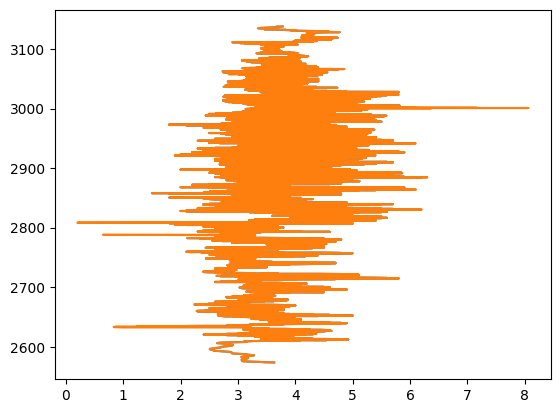

In [25]:
plt.plot(well['PE'],well['Depth'])
plt.plot(df['PE'],df['Depth'])

In [34]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate and print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Generate and print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [35]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')